In [36]:
import pandas as pd
import numpy as np
from sklearn import cluster

In [37]:
df=pd.read_csv(r"C:\Users\gauta\OneDrive\Desktop\Datasets\CC GENERAL.csv")
df.sample(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5765,C15926,408.724408,1.000000,89.39,89.39,0.00,108.912198,0.083333,0.083333,0.000000,0.083333,1,1,3000.0,166.426897,211.611083,0.000000,12
6160,C16331,82.414018,1.000000,219.24,0.00,219.24,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1500.0,128.095464,170.440977,0.000000,12
1476,C11526,2475.660894,0.909091,440.00,440.00,0.00,0.000000,0.272727,0.272727,0.000000,0.000000,0,3,10500.0,511.059528,492.803429,0.000000,11
5409,C15562,788.595800,1.000000,3858.06,3678.81,179.25,974.547645,0.916667,0.833333,0.166667,0.333333,6,44,7050.0,8123.060053,3915.696493,0.444444,12
6214,C16387,635.358243,0.400000,250.00,250.00,0.00,0.000000,0.100000,0.100000,0.000000,0.000000,0,1,8000.0,4995.053024,284.706930,0.000000,10


***Column Descriptions:***

- **CUST_ID**: Unique ID of customer
- **BALANCE**: Bank account balance
- **BALANCE_FREQUENCY**: Frequency of updating the balance, 1-frequently update,0-not frequently updated
- **PURCHASES**: number of purchases made
- **ONEOFF_PURCHASES**: Maximum amount of one time purchase
- **INSTALLMENTS_PURCHASES**-Amount of purchases on installments
- **CASH_ADVANCE**-Advance cash paid by the customer
- **PURCHASES_FREQUENCY**-Frequency of purchases, 1-frequently purchased,0-low frequency
- **ONEOFF_PURCHASES_FREQUENCY**-Frequency of one time payment purchase
- **PURCHASES_INSTALLMENTS_FREQUENCY**-Frequency of purhcases on installments(1-High Frequency,0-Low frequency)
- **CASH_ADVANCE_FREQUENCY**-Frequency of cash in advance payments
- **CASH_ADVANCE_TRX**-Number of transactions where the cardholder used their credit card to withdraw cash 
- **PURCHASES_TRX**-Total number of purchase transactions made using the credit card (e.g., shopping, dining)
- **CREDIT_LIMIT**-The maximum amount of credit assigned to the cardholder by the bank 
- **PAYMENTS**-Total amount of money the cardholder has paid toward their credit card dues
- **MINIMUM_PAYMENTS**-The minimum amount the cardholder is required to pay by the due date to avoid penalties or late fees
- **PRC_FULL_PAYMENT**-Percentage of months (out of the total tenure) where the cardholder paid the full statement balance. A higher value suggests responsible usage and no interest charges
- **TENURE**-Number of months the card account has been active (how long the customer has been using the card)

In [39]:
#Checking for null values
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [40]:
#Dropping the null values in Minimum payments
df=df.dropna().reset_index(drop=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8636 entries, 0 to 8635
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHA

In [42]:
#Renaming the columns 
df.rename(columns={
    'CUST_ID': 'cust_id',
    'BALANCE': 'balance',
    'BALANCE_FREQUENCY': 'balance_frequency',
    'PURCHASES': 'purchases',
    'ONEOFF_PURCHASES': 'oneoff_purchases',
    'INSTALLMENTS_PURCHASES': 'installments_purchases',
    'CASH_ADVANCE': 'cash_advance',
    'PURCHASES_FREQUENCY': 'purchases_frequency',
    'ONEOFF_PURCHASES_FREQUENCY': 'oneoff_purchases_frequency',
    'PURCHASES_INSTALLMENTS_FREQUENCY': 'purchases_installments_frequency',
    'CASH_ADVANCE_FREQUENCY': 'cash_advance_frequency',
    'CASH_ADVANCE_TRX': 'cash_advance_trx',
    'PURCHASES_TRX': 'purchases_trx',
    'CREDIT_LIMIT': 'credit_limit',
    'PAYMENTS': 'payments',
    'MINIMUM_PAYMENTS': 'minimum_payments',
    'PRC_FULL_PAYMENT': 'prc_full_payment',
    'TENURE': 'tenure'
}, inplace=True)

In [60]:
#Using 3 columns for clustering, first using MinMaxScaler,normalisation technique to get on a common scale
clustering_data=df[["balance","purchases","credit_limit"]]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(clustering_data)
    
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5)
clusters=kmeans.fit_predict(clustering_data)
df["Credit Card Segments"]=clusters

In [64]:
df["Credit Card Segments"]=df["Credit Card Segments"].map({
    0:"Cluster 1",
    1:"Cluster 2",
    2:"Cluster 3",
    3:"Cluster 4",
    4:"Cluster 5"})
df["Credit Card Segments"].head(10)

0    Cluster 1
1    Cluster 4
2    Cluster 4
3    Cluster 1
4    Cluster 1
5    Cluster 3
6    Cluster 1
7    Cluster 4
8    Cluster 3
9    Cluster 1
Name: Credit Card Segments, dtype: object

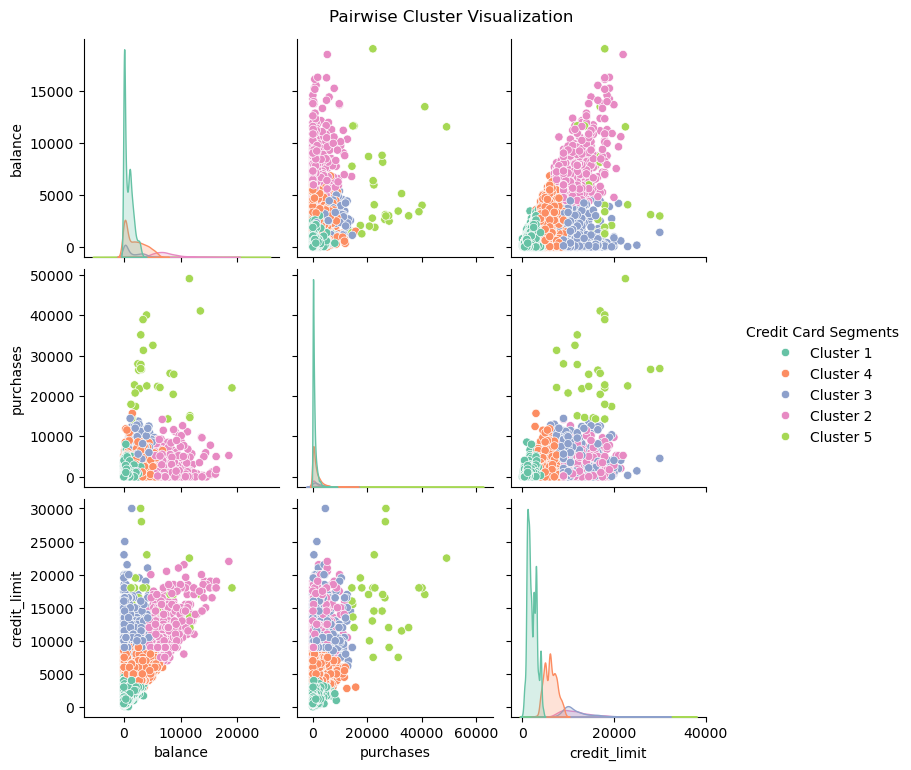

In [72]:
# Optional: Encode clusters as category if needed
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, vars=["balance", "purchases", "credit_limit"], hue="Credit Card Segments", palette='Set2')
plt.suptitle("Pairwise Cluster Visualization", y=1.02)
plt.show()


***ANALYSIS***

**Cluster 1(Green)** - These customers have high credit limits, high purchases and high balances
We can offer rewards,offers,cashback, provide dedicated relationship managers and personalised credti line enhancements

**Cluster 2(Pink)** - These customers have moderate spending,balances, could me middle income professionals , we can offer EMI based installment offers to increase spending,provide tailored incentives like travel awards,cashbacks and do cross sellling, offer them personal loans

**Cluster 3(Blue)**- These customers have moderate credit limit but low spending, these are occassional card users, to promote engagement, we can provide discounts on poular merchants ofeer easy installment plans, provide cashback if they spand above a threshold, encourage auto-pay

**Cluster 4(Orange)** - These customers have frequent purchases and but have low credit limits, we can inddentify top spenders and increase their credit limits, they can be possible defaulters so offer low minimum payment options

**Cluster 5(Light Green)** -These customers have high credit limit but low spending , these can be affluent cutsomers who do not depend on credit card, we can offer luxury brand partner ships or travek perks, cross sell premium products like investment plans ,offer annual fees waivers to keep them engaged